<a href="https://colab.research.google.com/github/bernabe-ortega-tenezaca/HIA/blob/main/HerramientasIAFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalación de librerías
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
#from bokeh.plotting import figure, show, output_notebook
#import plotly.express as px
#output_notebook()
#from dbfread import DBF

In [2]:
#Descargamos los archivos csv y la base de datos
!wget -q https://raw.githubusercontent.com/bernabe-ortega-tenezaca/databases/refs/heads/main/renewable_energy_dump.sql
!wget -q https://raw.githubusercontent.com/bernabe-ortega-tenezaca/databases/b2c64bc3757c38ffe9d6445d2afecd23ff6ad8e3/renewable_energy_part2.csv -O renewable_energy_part2.csv

In [3]:

# URL del archivo .dbf
# dbf_url = "https://raw.githubusercontent.com/bernabe-ortega-tenezaca/databases/refs/heads/main/renewable_energy_dump.sql"

# Crear una base de datos en memoria o en archivo
conn = sqlite3.connect("renewable_energy.db")
cursor = conn.cursor()

# Leer y ejecutar el archivo SQL
with open("renewable_energy_dump.sql", "r") as f:
  sql_script = f.read()

try:
  cursor.executescript(sql_script)
  conn.commit()
  print("✅ Script SQL ejecutado correctamente.")
except Exception as e:
  print(f"❌ Error al ejecutar el script SQL: {e}")



✅ Script SQL ejecutado correctamente.


In [4]:

# Mostrar nombres de las tablas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tablas = cursor.fetchall()
print("📋 Tablas encontradas:", tablas)

# Mostrar contenido de la primera tabla (si existe)
if tablas:
  nombre_tabla = tablas[0][0]
  df = pd.read_sql_query(f"SELECT * FROM {nombre_tabla}", conn)
  display(df.head())
else:
  print("⚠️ No se encontraron tablas en la base de datos.")

📋 Tablas encontradas: [('renewable_energy',)]


,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [5]:
df_csv = pd.read_csv('renewable_energy_part2.csv')
df_csv.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,Brazil,2009,Biomass,85032.379065,18363.019473,8.518900e+09,928570600,1.496729e+14,4821.504128,14602.697620,...,58.936056,84.717735,49.225787,724,6,416,897784,67.322446,1,0
1,France,2020,Wind,6334.259527,48185.747768,2.536794e+09,357579506,1.332357e+14,420985.185769,28110.977361,...,67.139377,40.495110,69.766682,970,95,5137,749281,15.744480,0,0
2,France,2023,Biomass,45119.208193,13800.762270,9.243946e+09,318356967,1.005810e+14,607122.965207,76045.953431,...,0.709996,73.286470,82.589434,901,85,5577,35162,58.675909,0,0
3,Brazil,2006,Solar,78745.139303,18900.197367,1.111977e+09,105980391,1.856537e+13,623308.396728,50620.864251,...,17.586249,69.704125,78.940080,634,75,4974,372126,3.511163,0,1
4,Australia,2020,Wind,35205.869666,29966.392561,1.568387e+09,176909122,8.154568e+13,932155.446499,73094.312204,...,34.768870,77.930045,98.093424,593,10,3506,325331,38.899629,1,0


In [6]:
df_combined = pd.concat([df, df_csv], ignore_index=True)
df_combined.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [7]:
df_combined.columns = df_combined.columns.str.replace(' ', '_').str.lower()
df_combined.columns


Index(['country', 'year', 'energy_type', 'production_(gwh)',
       'installed_capacity_(mw)', 'investments_(usd)', 'population', 'gdp',
       'energy_consumption', 'energy_exports', 'energy_imports',
       'co2_emissions', 'renewable_energy_jobs', 'government_policies',
       'r&d_expenditure', 'renewable_energy_targets',
       'average_annual_temperature', 'annual_rainfall', 'solar_irradiance',
       'wind_speed', 'hydro_potential', 'geothermal_potential',
       'biomass_availability', 'energy_storage_capacity',
       'grid_integration_capability', 'electricity_prices', 'energy_subsidies',
       'international_aid_for_renewables', 'public_awareness',
       'energy_efficiency_programs', 'urbanization_rate',
       'industrialization_rate', 'energy_market_liberalization',
       'renewable_energy_patents', 'educational_level',
       'technology_transfer_agreements', 'renewable_energy_education_programs',
       'local_manufacturing_capacity', 'import_tariffs_on_energy_equipme

In [8]:
# Estandarizar nombres de columnas
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Análisis descriptivo
print("Resumen estadístico:\n", df.describe())
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())

Resumen estadístico:
               year  production_(gwh)  installed_capacity_(mw)  \
count  1250.000000       1250.000000              1250.000000   
mean   2011.273600      48439.010403             25357.379162   
std       6.853519      28746.004107             14515.637645   
min    2000.000000       1072.712469               114.531639   
25%    2006.000000      23175.512068             12600.858903   
50%    2011.000000      46376.621397             25847.942787   
75%    2017.000000      73864.191351             37873.439856   
max    2023.000000      99937.503719             49997.387577   

       investments_(usd)    population           gdp  energy_consumption  \
count       1.250000e+03  1.250000e+03  1.250000e+03         1250.000000   
mean        4.943535e+09  7.478954e+08  1.013058e+14       494000.454745   
std         2.894127e+09  4.373820e+08  5.739095e+13       291991.928259   
min         1.533899e+07  2.273375e+06  6.965307e+10         1264.851083   
25%         

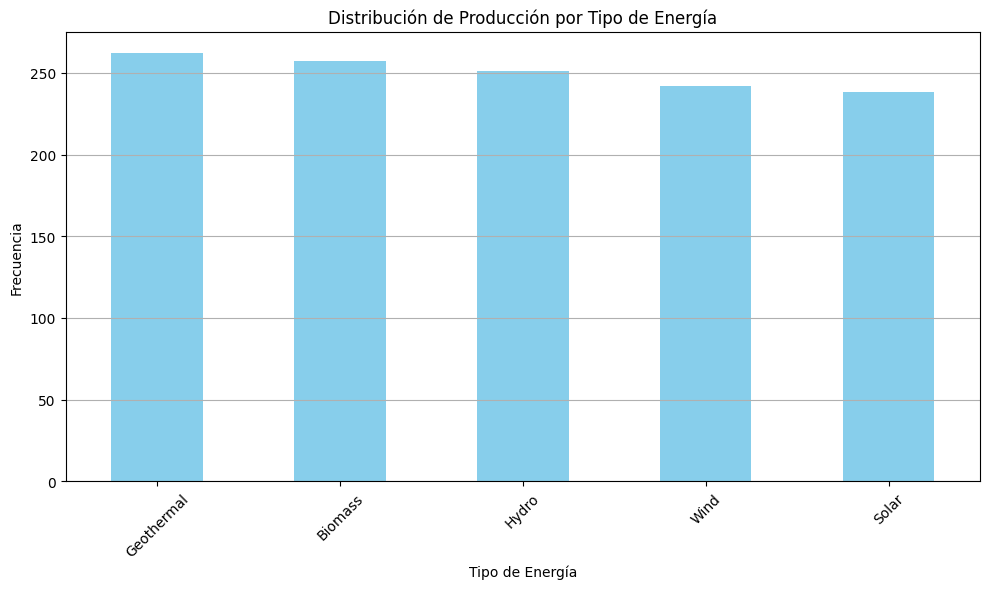

In [9]:
# Visualización 1: Distribución por tipo de energía
plt.figure(figsize=(10, 6))
df['energy_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Producción por Tipo de Energía')
plt.xlabel('Tipo de Energía')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

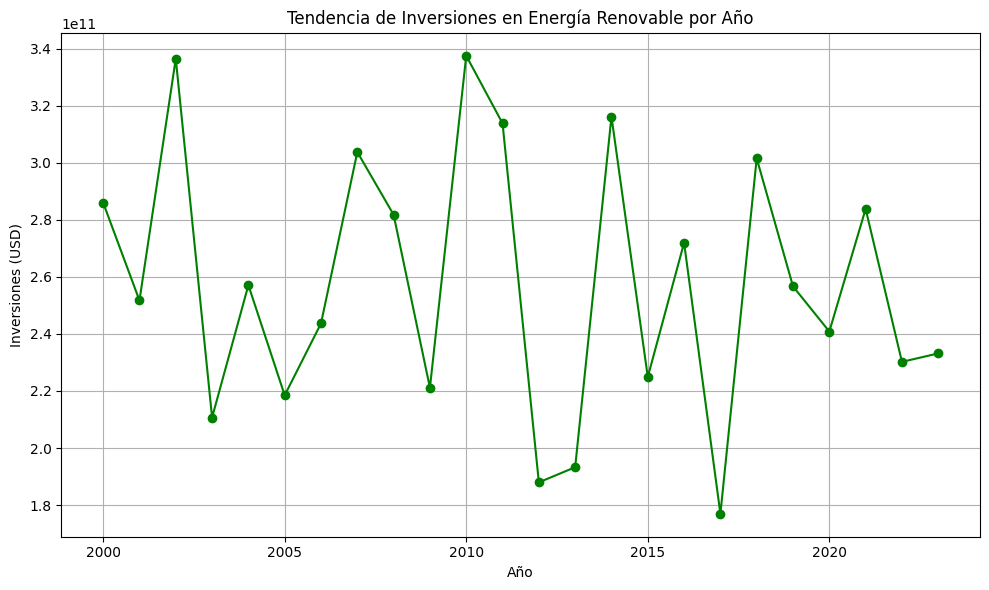

In [10]:
# Visualización: Inversión en energía renovable a lo largo del tiempo
plt.figure(figsize=(10, 6))
df.groupby('year')['investments_(usd)'].sum().plot(kind='line', marker='o', color='green')
plt.title('Tendencia de Inversiones en Energía Renovable por Año')
plt.xlabel('Año')
plt.ylabel('Inversiones (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


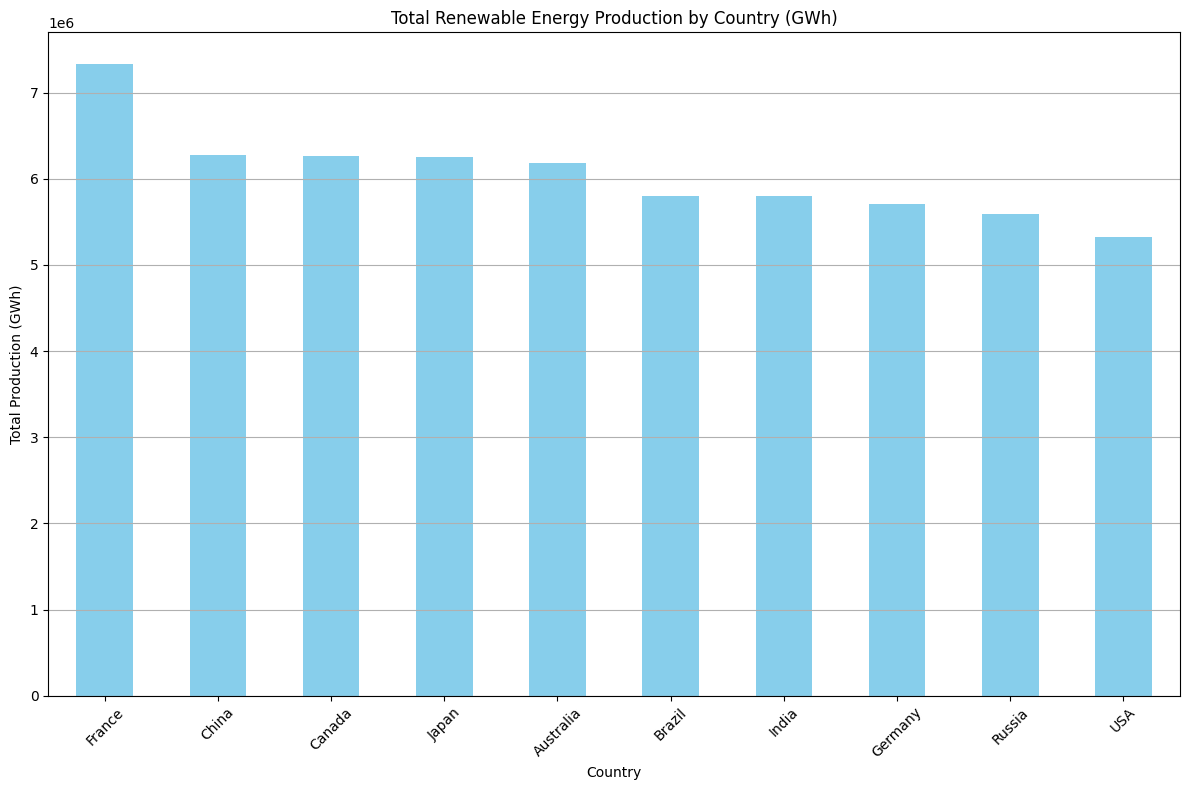

In [11]:
# Agrupar por país y sumar la producción
country_production = df.groupby('country')['production_(gwh)'].sum().sort_values(ascending=False)

# Gráfico de energias renovables por país
plt.figure(figsize=(12, 8))
country_production.plot(kind='bar', color='skyblue')
plt.title('Total Renewable Energy Production by Country (GWh)')
plt.xlabel('Country')
plt.ylabel('Total Production (GWh)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [12]:
df_brasil_solar = df_combined[(df_combined['country'] == 'Brazil') & (df_combined['energy_type'] == 'Solar')]
df_brasil_solar.head()

,country,year,energy_type,production_(gwh),installed_capacity_(mw),investments_(usd),population,gdp,energy_consumption,energy_exports,...,economic_freedom_index,ease_of_doing_business,innovation_index,number_of_research_institutions,number_of_renewable_energy_conferences,number_of_renewable_energy_publications,energy_sector_workforce,proportion_of_energy_from_renewables,public-private_partnerships_in_energy,regional_renewable_energy_cooperation
28,Brazil,2010,Solar,39491.786959,14223.860946,1.472171e+09,636023248,9.004019e+12,290910.888313,94385.895876,...,19.301396,6.804172,9.238379,98,57,8895,494,32.269610,0,1
117,Brazil,2009,Solar,1087.245594,30299.410872,4.686347e+09,932729473,1.539620e+14,940709.332155,99651.270866,...,41.925348,77.164961,3.647215,492,58,7437,877927,36.861216,1,0
146,Brazil,2011,Solar,25460.772329,17997.210988,8.013601e+08,1287627478,1.835424e+14,330583.688554,84746.956448,...,40.486792,6.879952,19.832445,337,75,3097,442198,8.745796,1,0
174,Brazil,2006,Solar,18920.571137,3391.263545,1.802572e+09,51843810,1.803628e+14,10294.902543,90052.947011,...,63.405215,20.363995,77.500968,293,96,8251,457269,3.842294,1,0
222,Brazil,2016,Solar,89553.347014,5021.215089,2.306911e+08,1336318209,1.027976e+14,755329.781304,41928.394654,...,76.508641,15.287388,81.195557,544,33,3109,267347,83.429927,1,0


In [13]:
# Separar la variable objetivo y las características
X = df_brasil_solar.drop(columns=['production_(gwh)', 'country', 'energy_type'])
y = df_brasil_solar['production_(gwh)']


In [14]:
# Imputar valores faltantes con la mediana
X = X.fillna(X.median())


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:

# Aplicar PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)


In [18]:

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [19]:

# Entrenar el modelo
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)



GradientBoostingRegressor(random_state=42)

In [20]:

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")


Error Cuadrático Medio (MSE): 454538886.85041386
Coeficiente de Determinación (R²): -0.6110385117180295


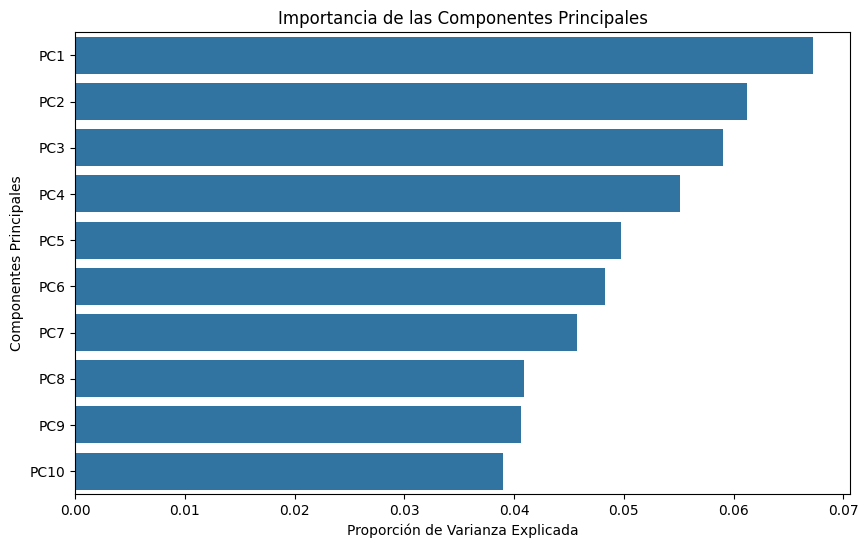

In [21]:

# Visualizar la importancia de las componentes principales
plt.figure(figsize=(10, 6))
sns.barplot(x=pca.explained_variance_ratio_, y=[f'PC{i+1}' for i in range(10)])
plt.xlabel('Proporción de Varianza Explicada')
plt.ylabel('Componentes Principales')
plt.title('Importancia de las Componentes Principales')
plt.show()


In [23]:
import joblib
import os

In [24]:

os.makedirs('model', exist_ok=True)
# Guardar archivos con nombres personalizados

joblib.dump(model, 'model/modelo_brasil_solar.pkl')
joblib.dump(scaler, 'model/modelo_brasil_scaler.pkl')
joblib.dump(pca, 'model/modelo_brasil_pca.pkl')




['model/modelo_brasil_pca.pkl']

In [25]:
from google.colab import files
files.download('model/modelo_brasil_solar.pkl')
files.download('model/modelo_brasil_scaler.pkl')
files.download('model/modelo_brasil_pca.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>